# Rossmann Store Sales Prediction from Kaggle
### Forecast the sales by using store, promotion, and competitor data

Data information
* Id - an Id that denotes a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [41]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [42]:
# Store data
store = pd.read_csv("/content/drive/MyDrive/Store sales prediction project/store.csv")
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [43]:
# Train data
train = pd.read_csv("/content/drive/MyDrive/Store sales prediction project/train.csv")
train

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [44]:
# Merge store and train data to obtain detail information of each store
combined_data= pd.merge(train,store,on ='Store')
combined_data


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [45]:
# Check missing values in the dataset
print('Total size of dataset:', len(combined_data))
print(combined_data.isnull().sum())

Total size of dataset: 1017209
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [46]:
# Check unique values
columns = list(combined_data.columns)
columns.remove('Date') # remove because it just only shows the date and make the dashboard more cleaner
columns.remove('CompetitionDistance')
for i in columns:
  print(i,'--->',combined_data[i].unique())


Store ---> [   1    2    3 ... 1113 1114 1115]
DayOfWeek ---> [5 4 3 2 1 7 6]
Sales ---> [ 5263  5020  4782 ... 20362 18841 21237]
Customers ---> [ 555  546  523 ... 3727 4022 4106]
Open ---> [1 0]
Promo ---> [1 0]
StateHoliday ---> ['0' 'a' 'b' 'c' 0]
SchoolHoliday ---> [1 0]
StoreType ---> ['c' 'a' 'd' 'b']
Assortment ---> ['a' 'c' 'b']
CompetitionOpenSinceMonth ---> [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear ---> [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 ---> [0 1]
Promo2SinceWeek ---> [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear ---> [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval ---> [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


### Sales with respect to year

<Figure size 5760x2880 with 0 Axes>

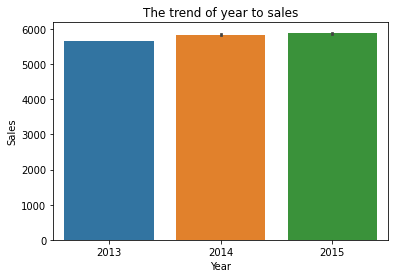

<Figure size 5760x2880 with 0 Axes>

In [47]:
# Extract year & month from 'Date' column
combined_data['Year'] = combined_data['Date'].apply(lambda x: int(str(x)[:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
# Sales with respect to year
sns.barplot(x='Year', y='Sales', data= combined_data).set(title='The trend of year to sales')
plt.figure(figsize=(80,40))


### Sales with respect to week

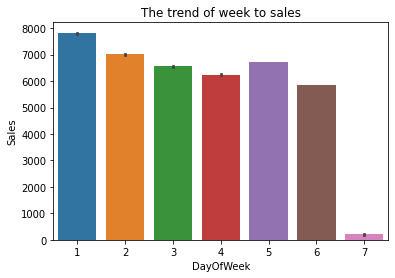

In [48]:
sns.barplot(x='DayOfWeek',y='Sales', data= combined_data).set(title='The trend of week to sales')
plt.show()

It could be noticed that sales on Sunday is far less than the other days

###Sales with respect to promo

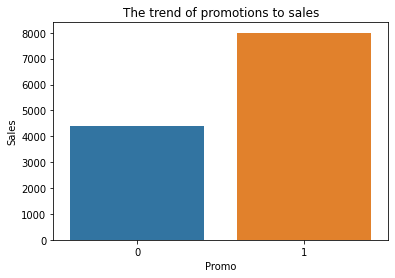

In [49]:
sns.barplot(x='Promo', y='Sales',data= combined_data).set(title='The trend of promotions to sales')
plt.show()

Result shows when there is a promotion day, the sales is more than the day without promotion

### Sales with respect to State holiday

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


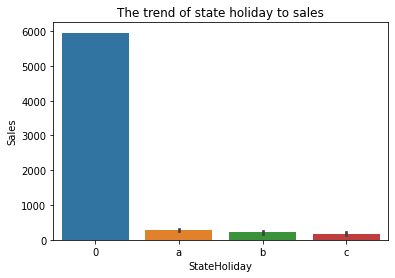

In [50]:
# In "StateHoliday" column, there are two values: 0 and "0", change values with 0 to "0"
combined_data["StateHoliday"].loc[combined_data['StateHoliday']==0]="0"
sns.barplot(x='StateHoliday',y='Sales',data=combined_data).set(title='The trend of state holiday to sales')
plt.show()

Result shows people prefer not to go shopping on holidays or it is because stores are closed during holidays
* a = Public Holiday
* b = Easter Holiday
* c = Chirstmas 
* 0 = No Holiday, Working day 

### Sales with respect to School Holidays

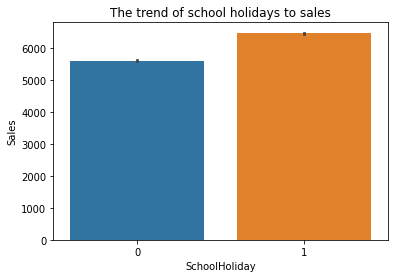

In [51]:
sns.barplot(x='SchoolHoliday',y='Sales',data=combined_data).set(title='The trend of school holidays to sales')
plt.show()

If there's school holiday, the sales are more than work days

### Sales with respect to store types

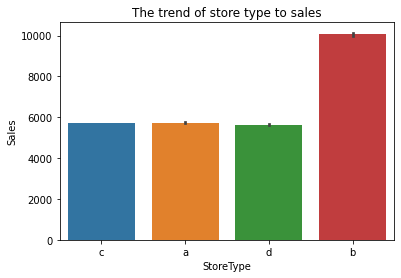

In [52]:
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='The trend of store type to sales')
plt.show()

Type b possesses the highest sales record

### Sales with respect to assortment

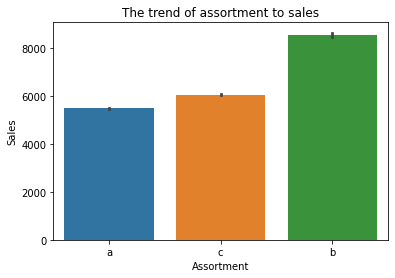

In [53]:
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='The trend of assortment to sales')
plt.show()

Assortment level b have the highest sales
Assortment levels:
* a = basic
* b = extra
* c = extended

## Filling missing values and removing outliers

### Imputing approach
1: The null values in column 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval' is due to Promo2 is 0 (no promotion) for those stores. Therefore those null values in these columns could also be replaced with 0.

2: Since Competition Distance for 3 stores isn't given, "Mean substitution" could be used to fill in as mean value is common to see for a randomly selected observation from a normal distribution

3: CompetitionOpenSinceMonth, CompetitionOpenSinceYear could be filled by using the most occuring month and year respectively. (It's not make sense by replacing with 0)

In [54]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [55]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [56]:
# Filling value 0 in columns:  Promo2SinceWeek, Promo2SinceYear, PromoInterval 
store.update(store[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(0))

In [57]:
# Filling CompetitionDistance with mean value
mean_competition_distance = store['CompetitionDistance'].mean()
store['CompetitionDistance'].fillna(mean_competition_distance, inplace=True)

In [58]:
# Filling value in columns: CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_competition_open_month= store['CompetitionOpenSinceMonth'].mode()[0]
mode_competition_open_year = store['CompetitionOpenSinceYear'].mode()[0]
store['CompetitionOpenSinceMonth'].fillna(mode_competition_open_month, inplace =True)
store['CompetitionOpenSinceYear'].fillna(mode_competition_open_year, inplace=True)

In [59]:
# Check null values
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

All missing values have been fixed

In [60]:
# Merge the fixed store data with train data
combined_data=pd.merge(train,store,on='Store')
combined_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [61]:
# Check missing values
combined_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

##Examine outliers

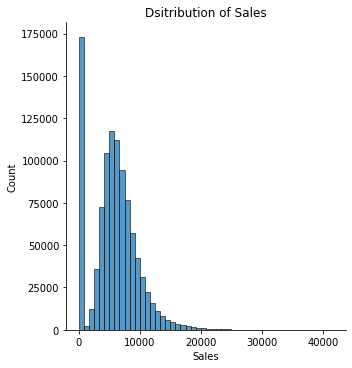

In [62]:
# Observing distribution of sales 
sns.displot(combined_data, x="Sales",bins=50).set(title='Dsitribution of Sales')

Result shows most of sales is under 10000, and sales over 25000 might be outliers since there are almost no sales located in that place

## Evaluated by Z-score (z-score measures the distance between a data point and the mean value by using standard deviation)

Mean of  Sales:  5773.818972305593
Standard Deviation of Sales: 3849.924282837463
Total outlier in dataset are:  9731
Maximum Sales Outlier:  41551
Minimum Sales Outlier:  17325


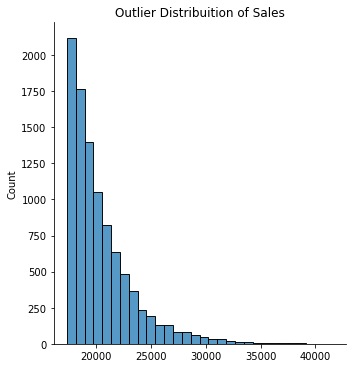

In [63]:
mean_of_sales= np.mean(combined_data['Sales'])
std_of_sales = np.std(combined_data['Sales'])
print("Mean of  Sales: ",mean_of_sales)
print("Standard Deviation of Sales:", std_of_sales)
threshold=3
outliers=[]
for i in combined_data['Sales']:
  z=(i-mean_of_sales)/std_of_sales
  if z>threshold:
    outliers.append(i)
print('Total outlier in dataset are: ', len(outliers))
print("Maximum Sales Outlier: ", max(outliers))
print("Minimum Sales Outlier: ", min(outliers))

sns.displot(x=outliers,bins=30).set(title='Outlier Distribuition of Sales')

In [64]:
# Looking for outliers
sales_zero = combined_data.loc[combined_data['Sales'] == 0] 
sales_greater_than_30k = combined_data.loc[combined_data['Sales'] > 30000]
# There are many data located around zero, because of this, even those data is over threshold, it would still be remained for training not to delete them

print("Amount of actual dataset:", len(combined_data))
print("Amount of data where sales is 0:", len(sales_zero),
      " which is", len(sales_zero)/len(combined_data)*100, "% of the whole data", )

print("Amount of data which is greater than 30k:", len(sales_greater_than_30k),
      " which is", len(sales_greater_than_30k)/len(combined_data)*100, "% of the whole data")

Amount of actual dataset: 1017209
Amount of data where sales is 0: 172871  which is 16.994639253093514 % of the whole data
Amount of data which is greater than 30k: 153  which is 0.015041156733768577 % of the whole data


In [65]:
combined_data.drop(combined_data.loc[combined_data['Sales']>30000].index, inplace=True)
combined_data.shape

(1017056, 18)

##EDA- special case
Remove data from where those days that stores were open but no sales, as this phenomenon is not commonlt to see and it may affect the result to the general days

In [66]:
# Records that there were no sales when stores were Open
no_holiday_zero_sales = combined_data.loc[(combined_data['Sales'] == 0) & (combined_data['Open'] == 1) & 
                                          (combined_data['StateHoliday'] == 0) & (combined_data['SchoolHoliday'] == 0)]

print("Size of the data where sales were zero even when stores were open: ",len(no_holiday_zero_sales))
no_holiday_zero_sales.head()

Size of the data where sales were zero even when stores were open:  12


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
22589,25,4,2014-02-13,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,0
22590,25,3,2014-02-12,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,0
25212,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"
205303,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,9.0,2013.0,0,0.0,0.0,0
297110,327,3,2014-03-12,0,0,1,0,0,0,c,c,1390.0,12.0,2004.0,0,0.0,0.0,0


In [67]:
combined_data.drop(combined_data.loc[(combined_data['Sales'] == 0) & (combined_data['Open'] == 1) & 
                                     (combined_data['StateHoliday'] == 0) & 
                                     (combined_data['SchoolHoliday'] == 0)].index,inplace=True)
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## Transform categorical data into numeric for analysing(encoding)

In [68]:
# Extrac year and month from Date and drop the column 'Date'
combined_data['Year']  = combined_data['Date'].apply(lambda x: int(str(x)[:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
combined_data.drop(['Date'],axis=1,inplace=True)

In [69]:
combined_data.head(1000)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,3918,501,1,0,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,6
996,2,7,0,0,0,0,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,6
997,2,6,2641,319,1,0,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,6
998,2,5,4938,532,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,6


In [70]:
# One hot encoding to all categorical varibale to numeric values
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

combined_data['StoreType']= label_encoder.fit_transform(combined_data['StoreType'])
combined_data['Assortment']= label_encoder.fit_transform(combined_data['Assortment']) 

# for promo interval
combined_data["PromoInterval"].loc[combined_data["PromoInterval"] == "Jan,Apr,Jul,Oct"] = 1
combined_data["PromoInterval"].loc[combined_data["PromoInterval"] == "Feb,May,Aug,Nov"] = 2
combined_data["PromoInterval"].loc[combined_data["PromoInterval"] == "Mar,Jun,Sept,Dec"] = 3

# for State Holiday
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == "a"] = 1
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == "b"] = 2
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == "c"] = 3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [71]:
combined_data.head(1000)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,3918,501,1,0,0,0,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1,2015,6
996,2,7,0,0,0,0,0,0,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1,2015,6
997,2,6,2641,319,1,0,0,0,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1,2015,6
998,2,5,4938,532,1,1,0,0,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1,2015,6


## Using heatmp to see each variable's correlation

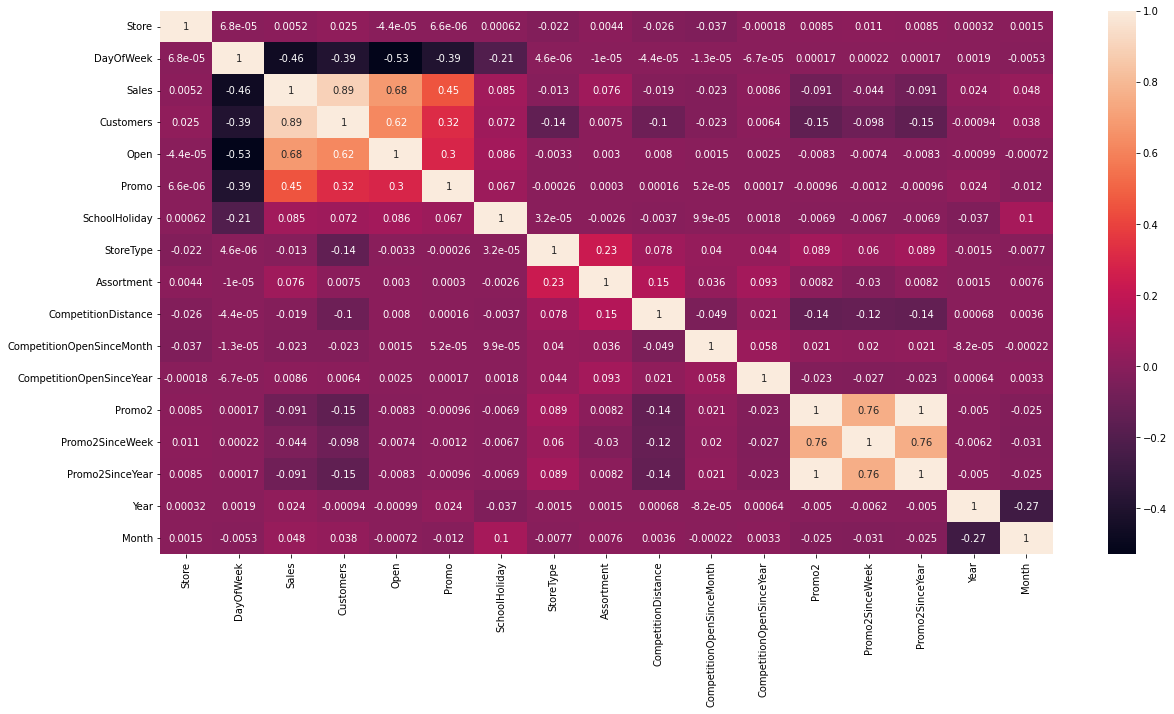

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(combined_data.corr(),annot=True)

#### Result shows
* Sales is highly correlated with Customers, Stores Open and Promo code
* Promo code is highly correlated to Promo2SinceWeek, Promo2SinceYear, PromoInterval

##Initiate to train model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math  

In [74]:
#Split data into open days and close days, as when it's closing days it's obvious that there will be no sales
combined_data_subset_open=combined_data[combined_data['Open']==1]
combined_data_subset_close = combined_data[combined_data['Open']==0]
x_train, x_test, y_train, y_test_open = train_test_split(combined_data_subset_open.drop(['Sales','Customers','Open'],axis=1), combined_data_subset_open['Sales'], test_size=0.2)


In [75]:
epsilon = 1e-10

In [76]:
x_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month'],
      dtype='object')

## Linear Regression

In [77]:
from sklearn import linear_model

regression_model = linear_model.LinearRegression() # create a regression model
regression_model.fit(x_train, y_train) 

prediction_open = regression_model.predict(x_test)

prediction_closed = np.zeros(combined_data_subset_close.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(combined_data_subset_close.shape[0]))

print("r-squared-score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))

r-squared-score:  0.7729509310892685
Mean absolute error: 1002.08
Root mean squared error:  1955.0835175493978


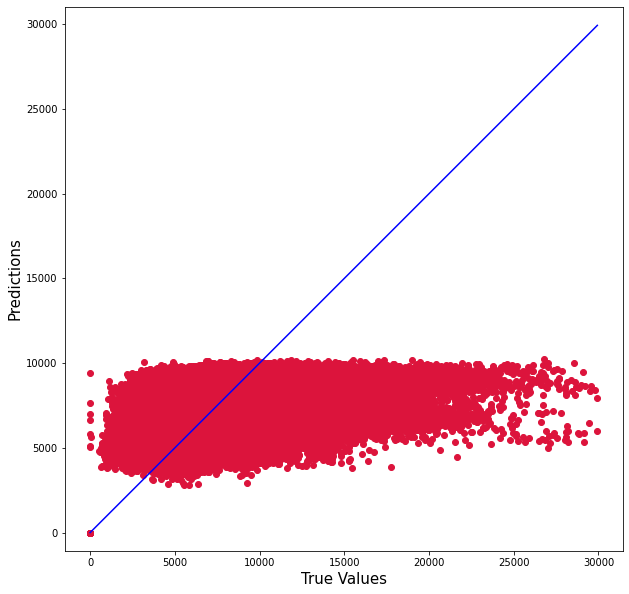

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Ideally, all the data should follow the blue line (45 degree), but the value of prediciton doesn't perform well on the value>10000

##SGD Regressor
Stochastic Gradient Descent is a optimization algorithm applied to find out the values of funcions which can minimize a cost function

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


r-squared-score:  -1.4348440483966576e+25
Mean absolute error: 6213741447397449.00
Root mean squared error:  1.5542032116848486e+16


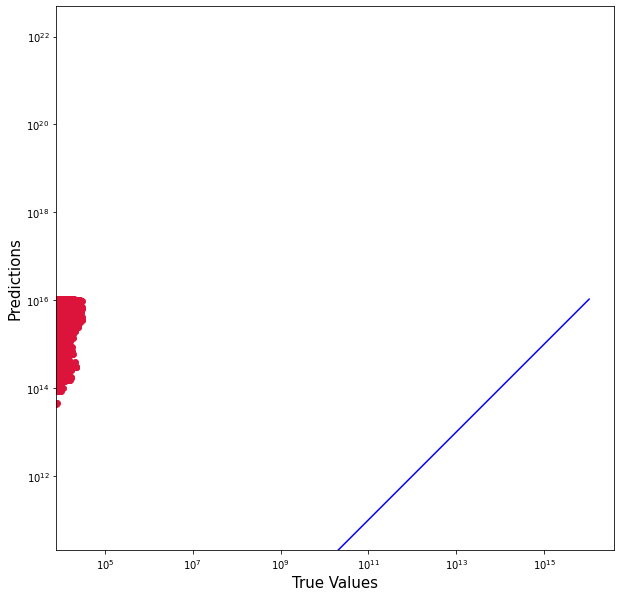

In [80]:
from sklearn.linear_model import SGDRegressor
sgd_regressor_model = SGDRegressor(max_iter=2)  # increasing this value leads to over fitting
sgd_regressor_model.fit(x_train,y_train)

prediction_open = sgd_regressor_model.predict(x_test)
prediction_close = np.zeros(combined_data_subset_close.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(combined_data_subset_close.shape[0]))

print("r-squared-score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))

plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Random Forest Regressor

r2_score:  0.9655921688534742
Mean absolute error: 357.12
Root mean squared error:  761.0866442472285


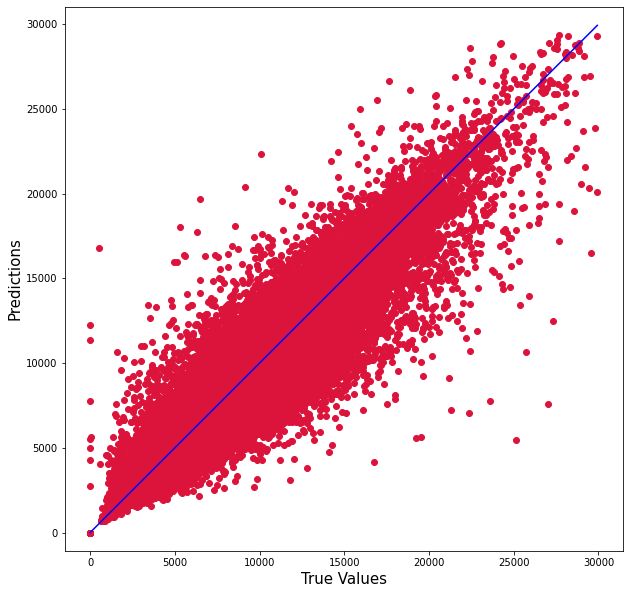

In [81]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(x_train,y_train)

prediction_open = random_forest_regressor_model.predict(x_test)
prediction_closed = np.zeros(combined_data_subset_close.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(combined_data_subset_close.shape[0]))

print("r-squared-score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))


plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Decision Tree Regressor

r-squared-score:  0.9522404280263664
Mean absolute error: 420.89
Root mean squared error:  896.6762455391832


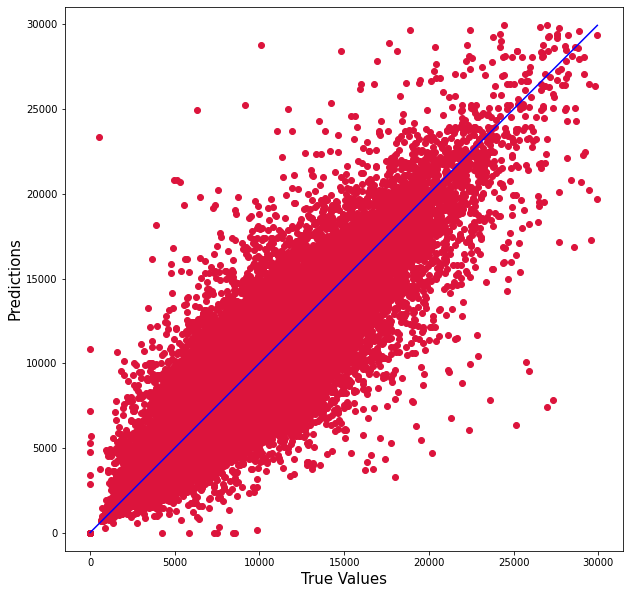

In [82]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor_model = DecisionTreeRegressor()
decision_tree_regressor_model.fit(x_train,y_train)

prediction_open = decision_tree_regressor_model.predict(x_test)
prediction_closed = np.zeros(combined_data_subset_close.shape[0])

prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, np.zeros(combined_data_subset_close.shape[0]))

print("r-squared-score: ",r2_score(y_test,prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,prediction))
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test,prediction)))


plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##Figure out important features to the result
Above algorithms show that using Random Forest Regressor could obtain the lowest Mean absolute error at predicting sales

In [83]:
# Listing weights of all the features used in the data
feature_importance = random_forest_regressor_model.feature_importances_
feature_importance

array([0.17990998, 0.08161285, 0.14011278, 0.00114502, 0.012689  ,
       0.0351881 , 0.03143256, 0.20774807, 0.0691452 , 0.07518661,
       0.00299915, 0.02952009, 0.03333793, 0.01297821, 0.02385418,
       0.06314026])

In [84]:
columns = list(x_train.columns)
columns

['Store',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Year',
 'Month']

In [85]:
# Combine items with feature importance
feature_important_value=[]
for i in range(len(feature_importance)):
  feature_important_value.append(round(feature_importance[i],5))
feature_important_value

[0.17991,
 0.08161,
 0.14011,
 0.00115,
 0.01269,
 0.03519,
 0.03143,
 0.20775,
 0.06915,
 0.07519,
 0.003,
 0.02952,
 0.03334,
 0.01298,
 0.02385,
 0.06314]

In [86]:
#Create a data frame
feature_importance_df=pd.DataFrame({"Features":columns, "Values": feature_important_value})
feature_importance_df

,Features,Values
0,Store,0.17991
1,DayOfWeek,0.08161
2,Promo,0.14011
3,StateHoliday,0.00115
4,SchoolHoliday,0.01269
5,StoreType,0.03519
6,Assortment,0.03143
7,CompetitionDistance,0.20775
8,CompetitionOpenSinceMonth,0.06915
9,CompetitionOpenSinceYear,0.07519


In [89]:
feature_importance_df.sort_values(by=['Values'],inplace=True,ascending=False)
feature_importance_df

,Features,Values
7,CompetitionDistance,0.20775
0,Store,0.17991
2,Promo,0.14011
1,DayOfWeek,0.08161
9,CompetitionOpenSinceYear,0.07519
8,CompetitionOpenSinceMonth,0.06915
15,Month,0.06314
5,StoreType,0.03519
12,Promo2SinceYear,0.03334
6,Assortment,0.03143


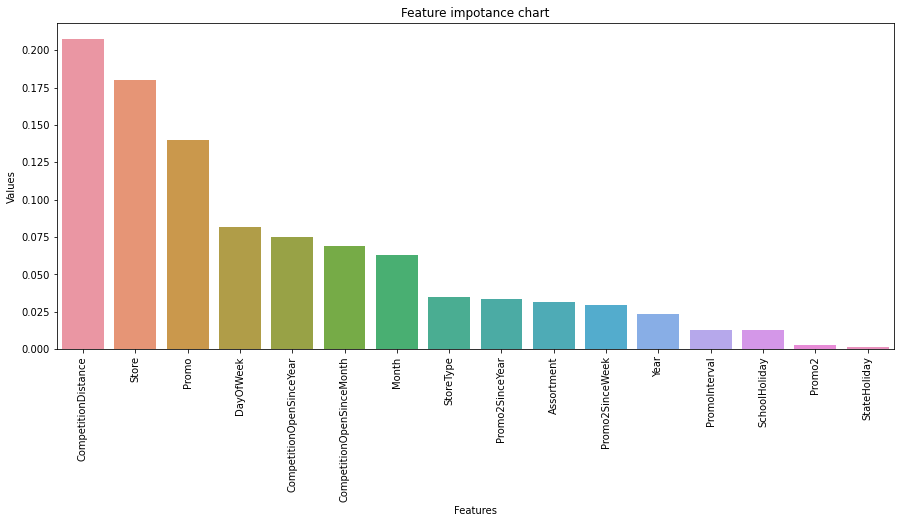

In [92]:
# List the feature importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'], data=feature_importance_df).set(title='Feature impotance chart')
plt.xticks(rotation=90)
plt.show()

## Conclusion
* Feature engineering is required ( remove shop close day data or special cases) as model doesn't need to predict sales when store is closed
* Closer competition distance plays a vital role as it got highest value
* Different types of stores may affect sales (type b has highest sales value)
* Promo code could be beneficial in increasing sales